# Highly Variable Genes (HVG)

In this notebook, we studying HVG of clusters identified by GraphST of PDAC dataset and 151673 sample from DLPFC dataset

We also collect the top 300 HVG in each dataset. The dataframe containing the top 300 HVG for 151673 sample is used in **RD_VAE.ipynb** script.

The top 300 HVG of each PDAC samples are used in **Venn_diagrams.ipynb** script.

# 0. Import packages

pip install scanpy

In [3]:
import os
import pandas as pd
import scanpy as sc

# 1. DLPFC : sample 151673

Preprocessing :

In [2]:
adata_151673 = sc.read_h5ad("/../../sbgenomics/project-files/graphst_anndata/151673_graphst_anndata.h5ad")

In [3]:
adata_151673

AnnData object with n_obs × n_vars = 3611 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'ground_truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ARI', 'domain_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'spatial', 'umap'
    obsm: 'X_umap', 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [4]:
adata_151673.var["highly_variable"]

MIR1302-2HG    False
FAM138A        False
OR4F5          False
AL627309.1     False
AL627309.3     False
               ...  
AC233755.2     False
AC233755.1     False
AC240274.1     False
AC213203.1     False
FAM231C        False
Name: highly_variable, Length: 33538, dtype: bool

Identify mitochondrial gene(s) :

In [5]:
adata_151673.var["mt"] = adata_151673.var_names.str.startswith("MT-")

Calcule QC metrics :

In [138]:
sc.pp.calculate_qc_metrics(adata_151673, qc_vars=["mt"], inplace=True)

In [7]:
adata_151673

AnnData object with n_obs × n_vars = 3611 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'ground_truth', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'ARI', 'domain_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'spatial', 'umap'
    obsm: 'X_umap', 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

Transform counts in log :

In [8]:
sc.pp.log1p(adata_151673)

In [9]:
adata_151673.uns["log1p"]

{'base': None}

In [10]:
sc.pp.pca(adata_151673)

Rank genes by cluster identified by GraphST :

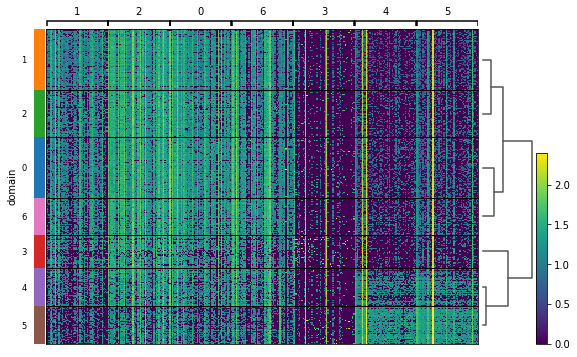

In [11]:
sc.tl.rank_genes_groups(adata_151673, "domain", method="t-test", key_added = "t-test")
sc.pl.rank_genes_groups_heatmap(adata_151673, n_genes=50, key="t-test", groupby="domain")

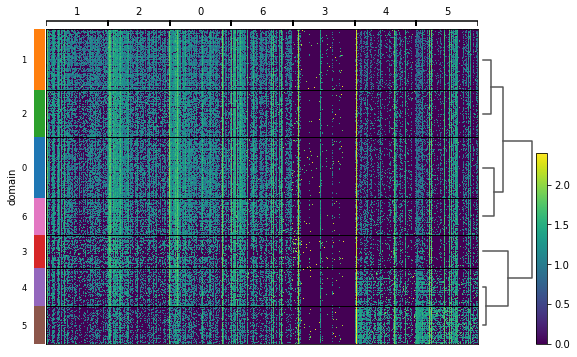

In [12]:
sc.pl.rank_genes_groups_heatmap(adata_151673, n_genes=300, key="t-test", groupby="domain")

In [13]:
adata_151673

AnnData object with n_obs × n_vars = 3611 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'ground_truth', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'ARI', 'domain_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'spatial', 'umap', 'pca', 't-test', 'dendrogram_domain'
    obsm: 'X_umap', 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

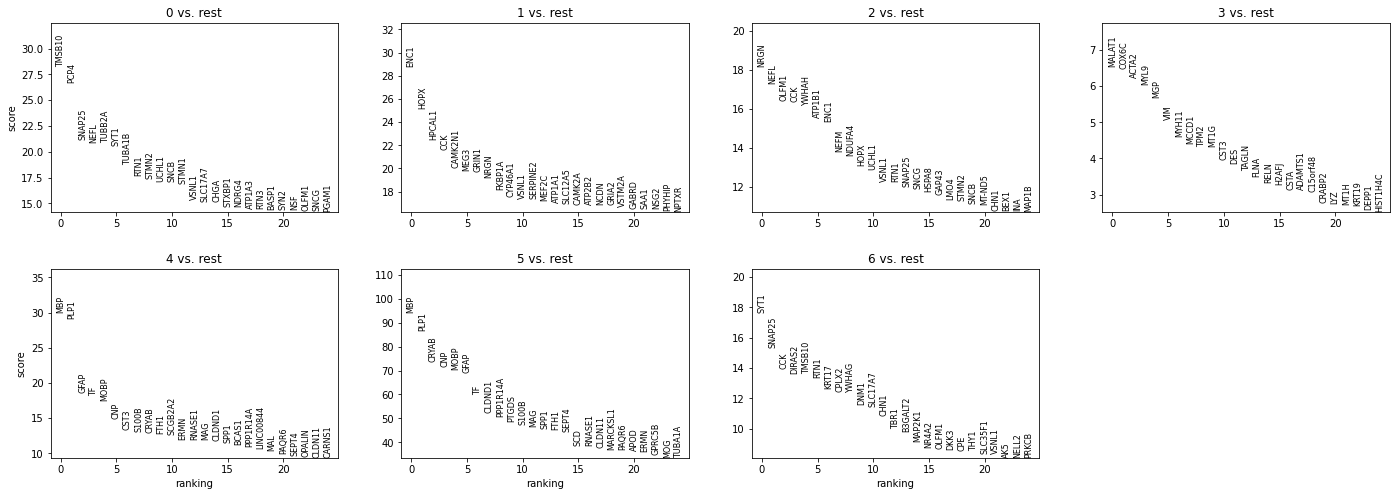

In [14]:
sc.tl.rank_genes_groups(adata_151673, "domain", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_151673, n_genes=25, sharey=False, key = "t-test")

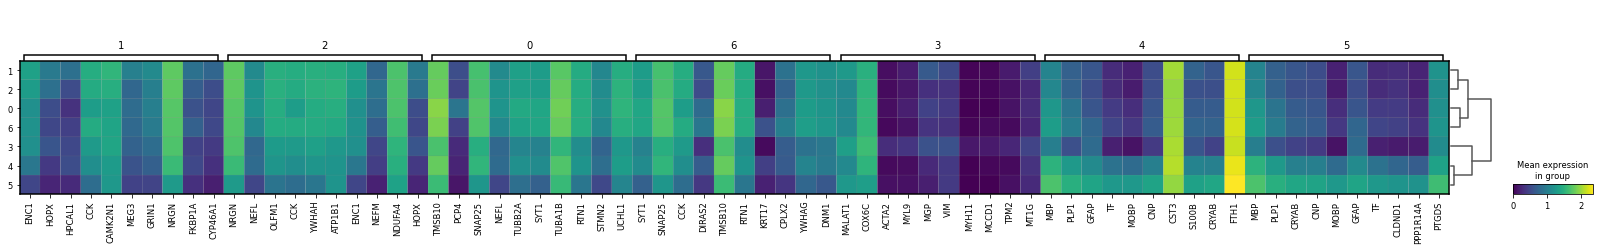

In [15]:
sc.pl.rank_genes_groups_matrixplot(adata_151673, n_genes=10, key="t-test", groupby="domain")


## Get the top 300 HVG

In [145]:
adata_151673_var = adata_151673_var.drop(adata_151673_var[adata_151673_var.highly_variable == False].index)
adata_151673_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
HES4,ENSG00000188290,Gene Expression,GRCh38,True,1476.0,0.303105,0.376766,1.078310,0.294165,0.555176,False,868,0.274317,0.242411,75.962337,990.559509,6.899279
VWA1,ENSG00000179403,Gene Expression,GRCh38,True,414.0,0.287442,0.397289,1.206245,0.300167,0.604918,False,782,0.253234,0.225727,78.343949,914.426575,6.819390
ATAD3B,ENSG00000160072,Gene Expression,GRCh38,True,2216.0,0.086562,0.097233,1.052656,0.088738,0.322421,False,283,0.115956,0.109711,92.162836,418.716034,6.039578
AL645728.1,ENSG00000215014,Gene Expression,GRCh38,True,715.0,0.006320,0.007382,1.137222,0.006559,0.088466,False,20,0.013086,0.013001,99.446137,47.253727,3.876473
GABRD,ENSG00000187730,Gene Expression,GRCh38,True,793.0,1.167079,1.996266,1.127353,0.893628,0.813086,False,2132,0.611528,0.477183,40.958183,2208.228516,7.700398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRRC3,ENSG00000160233,Gene Expression,GRCh38,True,542.0,0.002748,0.003291,1.169459,0.003189,0.071859,False,9,0.005976,0.005959,99.750762,21.581060,3.117111
ITGB2,ENSG00000160255,Gene Expression,GRCh38,True,2637.0,0.056334,0.061971,1.043984,0.066508,0.295846,False,191,0.086501,0.082962,94.710606,312.353973,5.747334
MCM3AP-AS1,ENSG00000215424,Gene Expression,GRCh38,True,142.0,0.003847,0.005483,1.389333,0.003962,0.081754,False,11,0.007078,0.007053,99.695375,25.558071,3.279334
DIP2A,ENSG00000160305,Gene Expression,GRCh38,True,2462.0,0.100577,0.113026,1.047297,0.105675,0.347625,False,333,0.132492,0.124421,90.778178,478.428955,6.172596


In [147]:
adata_151673_var = adata_151673_var.sort_values(by=['highly_variable_rank'])

In [149]:
adata_151673_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
NPY,ENSG00000122585,Gene Expression,GRCh38,True,0.0,0.854630,138.081940,8.750579,0.419941,0.741033,False,1071,0.306491,0.267345,70.340626,1106.739136,7.010077
PLP1,ENSG00000123560,Gene Expression,GRCh38,True,1.0,9.711734,253.637331,6.112987,2.364196,1.351786,False,3261,0.937066,0.661174,9.692606,3383.743652,8.127033
IGKC,ENSG00000211592,Gene Expression,GRCh38,True,2.0,1.015389,8.721039,5.887442,0.634421,0.950242,False,1343,0.368028,0.313370,62.808086,1328.947876,7.192895
HBB,ENSG00000244734,Gene Expression,GRCh38,True,3.0,0.618577,4.073278,5.078810,0.423715,0.809780,False,933,0.275343,0.243216,74.162282,994.265198,6.903009
HBA2,ENSG00000188536,Gene Expression,GRCh38,True,4.0,0.595493,3.680749,4.805142,0.442429,0.778113,False,1058,0.306061,0.267016,70.700637,1105.185547,7.008673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRM5,ENSG00000168959,Gene Expression,GRCh38,True,2995.0,0.281946,0.334449,1.037368,0.269784,0.525402,False,828,0.266015,0.235874,77.070064,960.579773,6.868577
GNG13,ENSG00000127588,Gene Expression,GRCh38,True,2996.0,0.066777,0.073330,1.037326,0.065566,0.268237,False,224,0.097774,0.093285,93.796732,353.062866,5.869474
BMT2,ENSG00000164603,Gene Expression,GRCh38,True,2997.0,0.066777,0.073330,1.037326,0.070135,0.285355,False,223,0.097333,0.092883,93.824425,351.471069,5.864968
FOXF1,ENSG00000103241,Gene Expression,GRCh38,True,2998.0,0.022534,0.024231,1.037320,0.023926,0.169862,False,78,0.042751,0.041863,97.839934,154.375534,5.045845


In [151]:
adata_151673_var = adata_151673_var[:300]

In [152]:
adata_151673_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
NPY,ENSG00000122585,Gene Expression,GRCh38,True,0.0,0.854630,138.081940,8.750579,0.419941,0.741033,False,1071,0.306491,0.267345,70.340626,1106.739136,7.010077
PLP1,ENSG00000123560,Gene Expression,GRCh38,True,1.0,9.711734,253.637331,6.112987,2.364196,1.351786,False,3261,0.937066,0.661174,9.692606,3383.743652,8.127033
IGKC,ENSG00000211592,Gene Expression,GRCh38,True,2.0,1.015389,8.721039,5.887442,0.634421,0.950242,False,1343,0.368028,0.313370,62.808086,1328.947876,7.192895
HBB,ENSG00000244734,Gene Expression,GRCh38,True,3.0,0.618577,4.073278,5.078810,0.423715,0.809780,False,933,0.275343,0.243216,74.162282,994.265198,6.903009
HBA2,ENSG00000188536,Gene Expression,GRCh38,True,4.0,0.595493,3.680749,4.805142,0.442429,0.778113,False,1058,0.306061,0.267016,70.700637,1105.185547,7.008673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC025580.3,ENSG00000275672,Gene Expression,GRCh38,True,295.0,0.001924,0.002470,1.257597,0.001924,0.050094,False,6,0.003984,0.003976,99.833841,14.387373,2.733547
AL590434.1,ENSG00000284640,Gene Expression,GRCh38,True,296.0,0.001924,0.002470,1.257597,0.001964,0.050124,False,6,0.003984,0.003976,99.833841,14.387373,2.733547
C21orf62-AS1,ENSG00000205930,Gene Expression,GRCh38,True,297.0,0.001924,0.002470,1.257597,0.002345,0.064275,False,6,0.003984,0.003976,99.833841,14.387373,2.733547
AC017007.5,ENSG00000251126,Gene Expression,GRCh38,True,298.0,0.001924,0.002470,1.257597,0.001938,0.049022,False,6,0.003984,0.003976,99.833841,14.387373,2.733547


In [ ]:
adata_151673_var

In [154]:
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/HVG"
os.makedirs(sevenbg_output_path, exist_ok=True)
adata_151673_var.to_csv(f"{sevenbg_output_path}/151673_300_HVG.csv")

# save in workspace
outputs = ("../outputs/")
adata_151673_var.to_csv(f"{outputs}/151673_300_HVG.csv")

# 2. PDAC A1

Preprocessing :

In [16]:
adata_A1 = sc.read_h5ad("/../../sbgenomics/project-files/graphst_anndata/PDAC_A1_anndata_graphst_6_clusters.h5ad")

In [17]:
adata_A1

AnnData object with n_obs × n_vars = 2368 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [18]:
adata_A1.var["highly_variable"]

SAMD11     False
NOC2L      False
KLHL17     False
PLEKHN1    False
PERM1      False
           ...  
TSPY1      False
USP9Y      False
DDX3Y      False
TMSB4Y     False
KDM5D      False
Name: highly_variable, Length: 17943, dtype: bool

In [19]:
adata_A1.var["mt"] = adata_A1.var_names.str.startswith("MT-")

In [20]:
sc.pp.calculate_qc_metrics(adata_A1, qc_vars=["mt"], inplace=True)

In [21]:
adata_A1

AnnData object with n_obs × n_vars = 2368 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [22]:
sc.pp.log1p(adata_A1)

In [23]:
adata_A1.uns["log1p"]

{'base': None}

In [24]:
sc.pp.pca(adata_A1)

Rank genes :

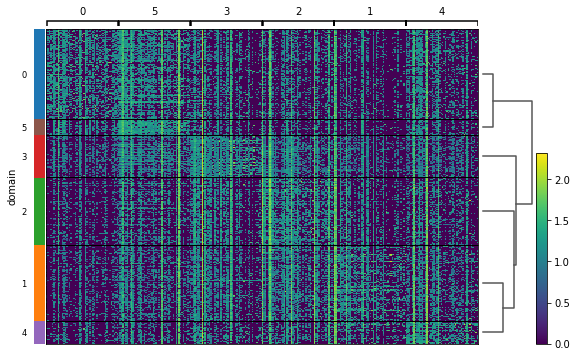

In [25]:
sc.tl.rank_genes_groups(adata_A1, "domain", method="t-test", key_added = "t-test")
sc.pl.rank_genes_groups_heatmap(adata_A1, n_genes=50, key="t-test", groupby="domain")

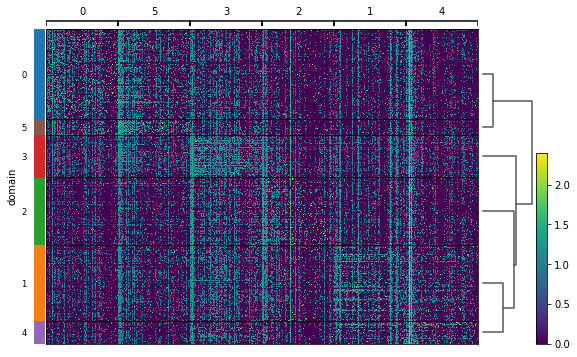

In [26]:
sc.pl.rank_genes_groups_heatmap(adata_A1, n_genes=300, key="t-test", groupby="domain")

In [27]:
adata_A1

AnnData object with n_obs × n_vars = 2368 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial', 'pca', 't-test', 'domain_colors', 'dendrogram_domain'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

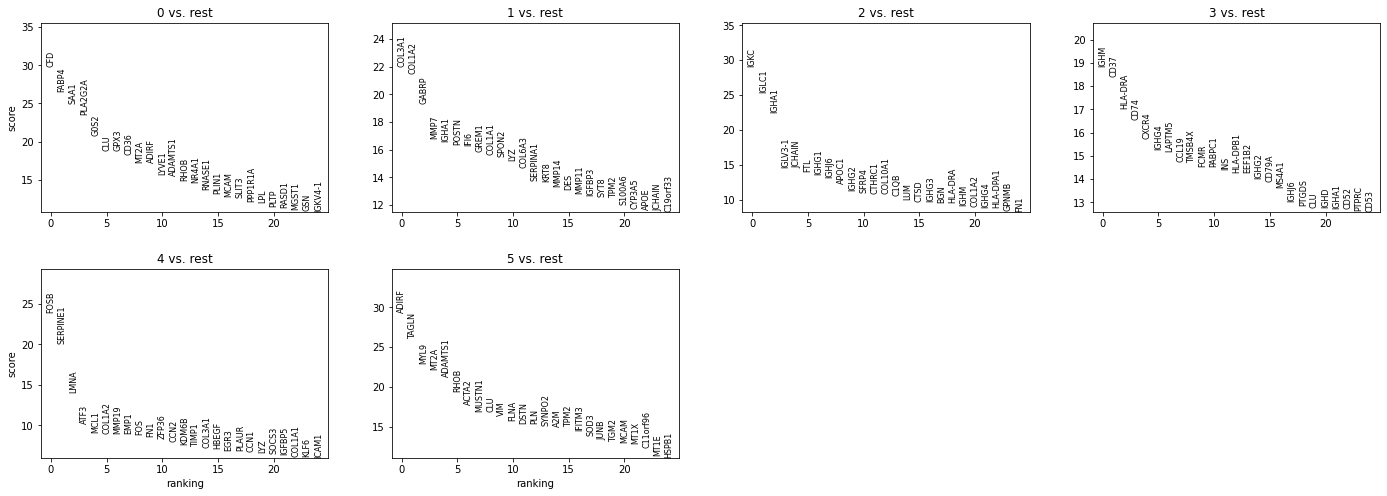

In [28]:
sc.tl.rank_genes_groups(adata_A1, "domain", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_A1, n_genes=25, sharey=False, key = "t-test")

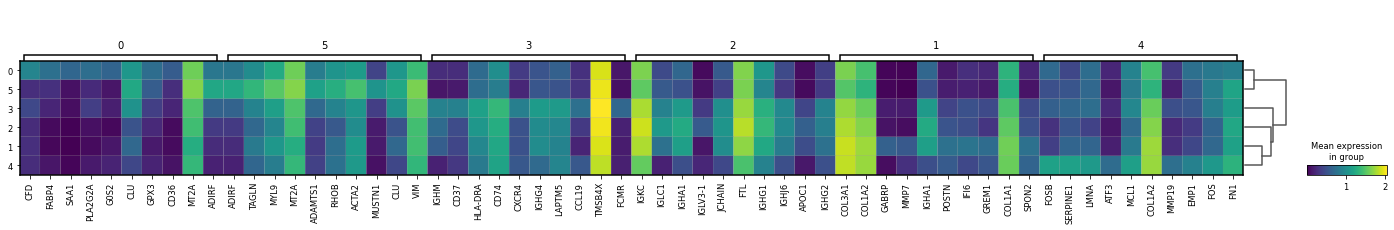

In [29]:
sc.pl.rank_genes_groups_matrixplot(adata_A1, n_genes=10, key="t-test", groupby="domain")


## Get the top 300 HVG

In [162]:
adata_A1_var = adata_A1.var

In [163]:
adata_A1_var = adata_A1_var.drop(adata_A1_var[adata_A1_var.highly_variable == False].index)
adata_A1_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ISG15,ENSG00000187608,Gene Expression,GRCh38,True,2337.0,0.242399,0.311307,1.046423,0.338560,0.722754,False,462,0.468431,0.384194,80.489865,1109.244385,7.012335
AGRN,ENSG00000188157,Gene Expression,GRCh38,True,177.0,0.296453,0.687744,1.821213,0.335930,0.724334,False,448,0.463778,0.381020,81.081081,1098.225220,7.002361
VWA1,ENSG00000179403,Gene Expression,GRCh38,True,1683.0,0.263936,0.354897,1.079604,0.354324,0.739483,False,482,0.479151,0.391468,79.645270,1134.629517,7.034943
FNDC10,ENSG00000228594,Gene Expression,GRCh38,True,1598.0,0.027872,0.032176,1.085921,0.041593,0.266258,False,60,0.156213,0.145150,97.466216,369.911865,5.915965
PLCH2,ENSG00000149527,Gene Expression,GRCh38,True,900.0,0.035895,0.044761,1.167560,0.050575,0.298981,False,74,0.167876,0.155187,96.875000,397.531464,5.987786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARHGAP4,ENSG00000089820,Gene Expression,GRCh38,True,737.0,0.176943,0.250469,1.207349,0.238915,0.613941,False,336,0.389150,0.328692,85.810811,921.507324,6.827096
FLNA,ENSG00000196924,Gene Expression,GRCh38,True,2272.0,3.076014,12.847620,1.048930,2.181716,1.214586,False,1937,1.796263,1.028284,18.201014,4253.550293,8.355744
PLXNA3,ENSG00000130827,Gene Expression,GRCh38,True,1461.0,0.112331,0.137778,1.097006,0.157206,0.504031,False,231,0.311898,0.271475,90.244932,738.574707,6.606075
F8,ENSG00000185010,Gene Expression,GRCh38,True,2185.0,0.008868,0.009638,1.052615,0.012547,0.142597,False,20,0.073715,0.071125,99.155405,174.558105,5.167970


In [164]:
adata_A1_var = adata_A1_var.sort_values(by=['highly_variable_rank'])

In [165]:
adata_A1_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
INS,ENSG00000254647,Gene Expression,GRCh38,True,0.0,2.429899,161.592887,11.836044,1.010473,1.374963,False,966,0.734910,0.550955,59.206081,1740.266235,7.462368
IGKV4-1,ENSG00000211598,Gene Expression,GRCh38,True,1.0,3.075591,140.249881,8.316419,1.612992,1.479436,False,1470,1.090275,0.737296,37.922297,2581.771240,7.856618
IGLV3-1,ENSG00000211673,Gene Expression,GRCh38,True,2.0,0.685811,15.311467,8.023959,0.461861,0.951003,False,517,0.485657,0.395857,78.167230,1150.036377,7.048418
TFF1,ENSG00000160182,Gene Expression,GRCh38,True,3.0,0.242821,2.802441,7.840084,0.183017,0.602225,False,227,0.303901,0.265360,90.413851,719.636780,6.580135
IGLC1,ENSG00000211675,Gene Expression,GRCh38,True,4.0,6.670608,444.189723,7.773168,2.090092,1.603256,False,1670,1.303656,0.834497,29.476351,3087.056885,8.035297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FGF5,ENSG00000138675,Gene Expression,GRCh38,True,2995.0,0.010980,0.011709,1.026650,0.019311,0.197886,False,25,0.086754,0.083195,98.944257,205.432327,5.329973
ZNF214,ENSG00000149050,Gene Expression,GRCh38,True,2996.0,0.010980,0.011709,1.026650,0.017434,0.177871,False,25,0.088633,0.084923,98.944257,209.883316,5.351305
NEFL,ENSG00000277586,Gene Expression,GRCh38,True,2997.0,0.010980,0.011709,1.026650,0.016412,0.165531,False,25,0.089699,0.085901,98.944257,212.407166,5.363202
TFAP2E,ENSG00000116819,Gene Expression,GRCh38,True,2998.0,0.010980,0.011709,1.026650,0.015957,0.162040,False,25,0.089170,0.085415,98.944257,211.153412,5.357310


In [166]:
adata_A1_var = adata_A1_var[:300]

In [167]:
adata_A1_var

,gene_ids,feature_types,genome,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
INS,ENSG00000254647,Gene Expression,GRCh38,True,0.0,2.429899,161.592887,11.836044,1.010473,1.374963,False,966,0.734910,0.550955,59.206081,1740.266235,7.462368
IGKV4-1,ENSG00000211598,Gene Expression,GRCh38,True,1.0,3.075591,140.249881,8.316419,1.612992,1.479436,False,1470,1.090275,0.737296,37.922297,2581.771240,7.856618
IGLV3-1,ENSG00000211673,Gene Expression,GRCh38,True,2.0,0.685811,15.311467,8.023959,0.461861,0.951003,False,517,0.485657,0.395857,78.167230,1150.036377,7.048418
TFF1,ENSG00000160182,Gene Expression,GRCh38,True,3.0,0.242821,2.802441,7.840084,0.183017,0.602225,False,227,0.303901,0.265360,90.413851,719.636780,6.580135
IGLC1,ENSG00000211675,Gene Expression,GRCh38,True,4.0,6.670608,444.189723,7.773168,2.090092,1.603256,False,1670,1.303656,0.834497,29.476351,3087.056885,8.035297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIPOR2,ENSG00000111913,Gene Expression,GRCh38,True,295.0,0.152449,0.262765,1.498765,0.186046,0.538474,False,270,0.345507,0.296771,88.597973,818.160034,6.708280
NPC1L1,ENSG00000015520,Gene Expression,GRCh38,True,296.0,0.011824,0.018449,1.497791,0.011388,0.127810,False,22,0.077779,0.074902,99.070946,184.180725,5.221332
CD27,ENSG00000139193,Gene Expression,GRCh38,True,297.0,0.111909,0.187302,1.497301,0.144198,0.481916,False,210,0.299219,0.261763,91.131757,708.549622,6.564631
PLA2G2A,ENSG00000188257,Gene Expression,GRCh38,True,298.0,0.544341,1.208848,1.497184,0.687100,1.119042,False,715,0.614007,0.478720,69.805743,1453.968628,7.282740


In [169]:
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/HVG"
os.makedirs(sevenbg_output_path, exist_ok=True)
adata_A1_var.to_csv(f"{sevenbg_output_path}/A1_300_HVG.csv")

# save in workspace
outputs = ("../outputs/")
adata_A1_var.to_csv(f"{outputs}/A1_300_HVG.csv")

# 3. PDAC B2

Preprocessing :

In [31]:
adata_B2 = sc.read_h5ad("/../../sbgenomics/project-files/graphst_anndata/PDAC_B2_anndata_graphst_6_clusters.h5ad")

In [32]:
adata_B2

AnnData object with n_obs × n_vars = 3085 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [33]:
adata_B2.var["highly_variable"]

SAMD11     False
NOC2L      False
KLHL17     False
PLEKHN1    False
PERM1      False
           ...  
TSPY1      False
USP9Y      False
DDX3Y      False
TMSB4Y     False
KDM5D      False
Name: highly_variable, Length: 17943, dtype: bool

In [34]:
adata_B2.var["mt"] = adata_B2.var_names.str.startswith("MT-")

In [35]:
sc.pp.calculate_qc_metrics(adata_B2, qc_vars=["mt"], inplace=True)

In [36]:
adata_B2

AnnData object with n_obs × n_vars = 3085 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [37]:
sc.pp.log1p(adata_B2)

In [38]:
adata_B2.uns["log1p"]

{'base': None}

In [39]:
sc.pp.pca(adata_B2)

Rank genes :

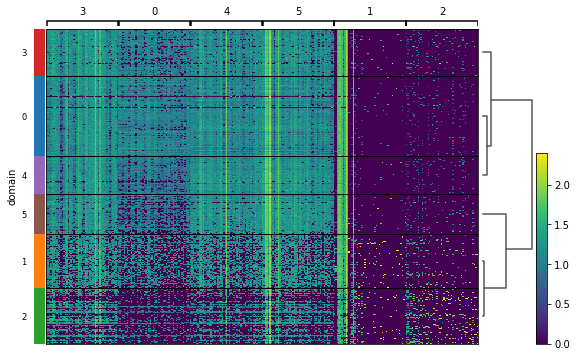

In [40]:
sc.tl.rank_genes_groups(adata_B2, "domain", method="t-test", key_added = "t-test")
sc.pl.rank_genes_groups_heatmap(adata_B2, n_genes=50, key="t-test", groupby="domain")

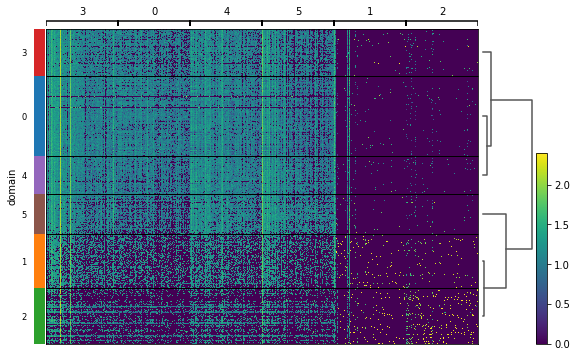

In [41]:
sc.pl.rank_genes_groups_heatmap(adata_B2, n_genes=300, key="t-test", groupby="domain")

In [42]:
adata_B2

AnnData object with n_obs × n_vars = 3085 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial', 'pca', 't-test', 'domain_colors', 'dendrogram_domain'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

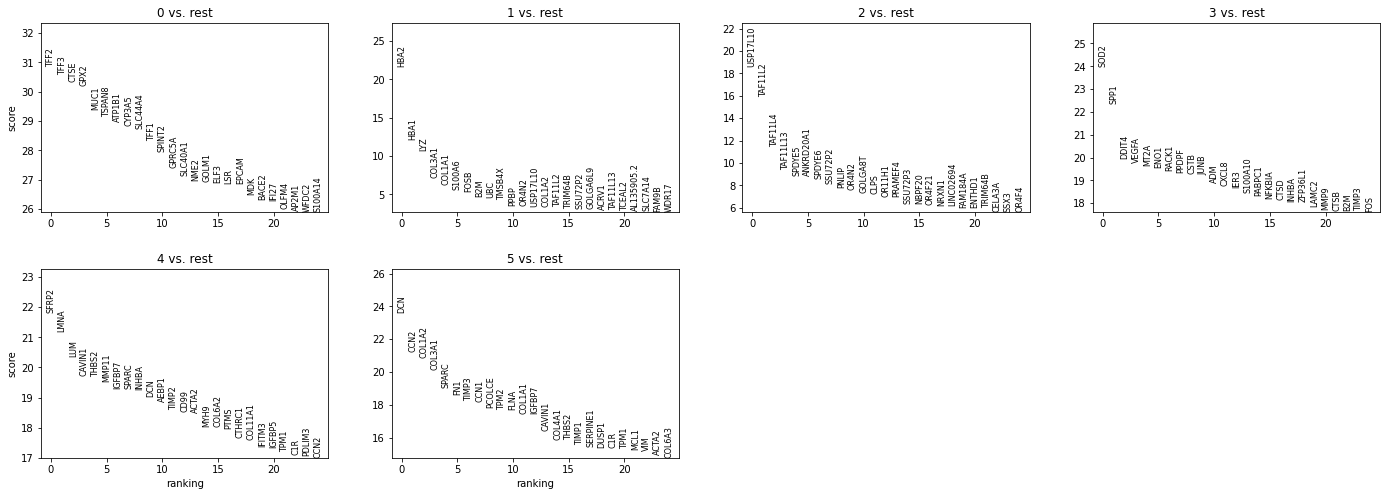

In [43]:
sc.tl.rank_genes_groups(adata_B2, "domain", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_B2, n_genes=25, sharey=False, key = "t-test")

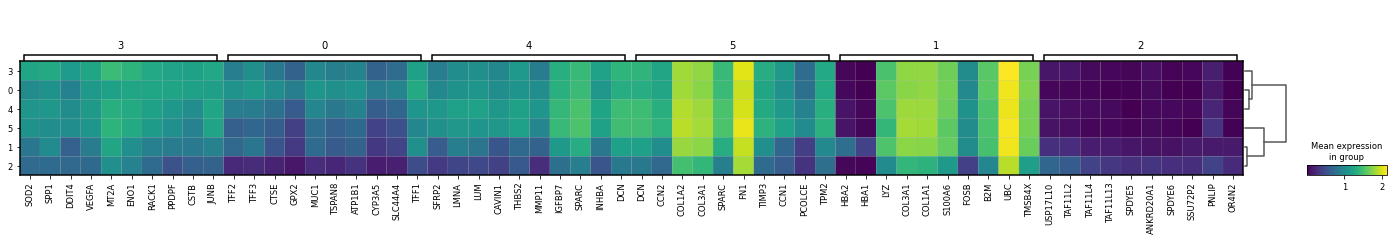

In [44]:
sc.pl.rank_genes_groups_matrixplot(adata_B2, n_genes=10, key="t-test", groupby="domain")


## Get the top 300 HVG

In [170]:
adata_B2_var = adata_B2.var

In [171]:
adata_B2_var = adata_B2_var.sort_values(by=['highly_variable_rank'])

In [172]:
adata_B2_var = adata_B2_var[:300]

In [173]:
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/HVG"
os.makedirs(sevenbg_output_path, exist_ok=True)
adata_B2_var.to_csv(f"{sevenbg_output_path}/B2_300_HVG.csv")

# save in workspace
outputs = ("../outputs/")
adata_B2_var.to_csv(f"{outputs}/B2_300_HVG.csv")

# 4. PanCN C3

Preprocessing :

In [46]:
adata_C3 = sc.read_h5ad("/../../sbgenomics/project-files/graphst_anndata/PanCN_C3_anndata_graphst_6_clusters.h5ad")

In [47]:
adata_C3

AnnData object with n_obs × n_vars = 2364 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [48]:
adata_C3.var["highly_variable"]

SAMD11      True
NOC2L      False
KLHL17     False
PLEKHN1     True
PERM1      False
           ...  
TSPY1      False
USP9Y      False
DDX3Y      False
TMSB4Y     False
KDM5D      False
Name: highly_variable, Length: 17943, dtype: bool

In [49]:
adata_C3.var["mt"] = adata_C3.var_names.str.startswith("MT-")

In [50]:
sc.pp.calculate_qc_metrics(adata_C3, qc_vars=["mt"], inplace=True)

In [51]:
adata_C3

AnnData object with n_obs × n_vars = 2364 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [52]:
sc.pp.log1p(adata_C3)

In [53]:
adata_C3.uns["log1p"]

{'base': None}

In [54]:
sc.pp.pca(adata_C3)

Rank genes :

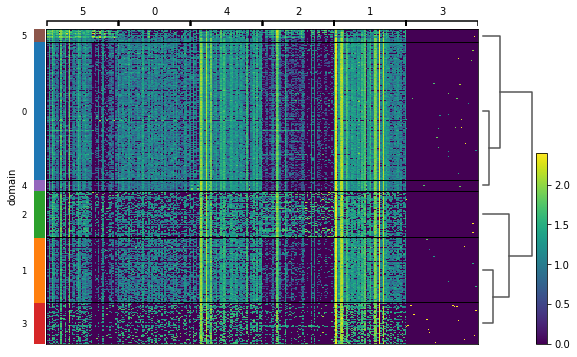

In [55]:
sc.tl.rank_genes_groups(adata_C3, "domain", method="t-test", key_added = "t-test")
sc.pl.rank_genes_groups_heatmap(adata_C3, n_genes=50, key="t-test", groupby="domain")

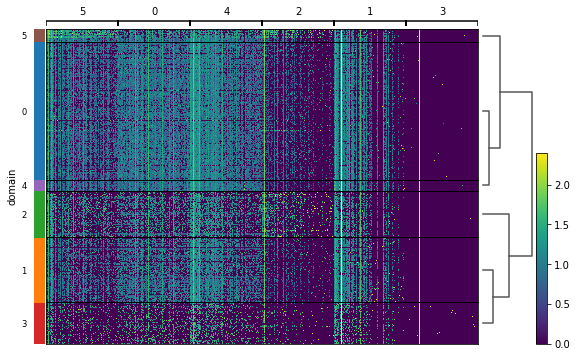

In [56]:
sc.pl.rank_genes_groups_heatmap(adata_C3, n_genes=300, key="t-test", groupby="domain")

In [57]:
adata_C3

AnnData object with n_obs × n_vars = 2364 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial', 'pca', 't-test', 'domain_colors', 'dendrogram_domain'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

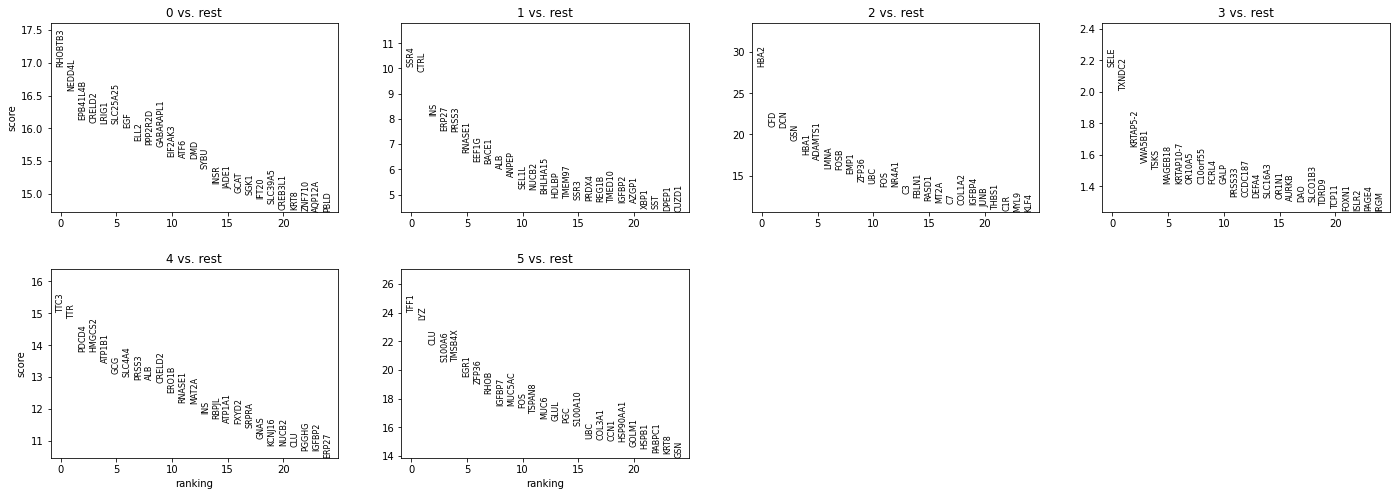

In [58]:
sc.tl.rank_genes_groups(adata_C3, "domain", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_C3, n_genes=25, sharey=False, key = "t-test")

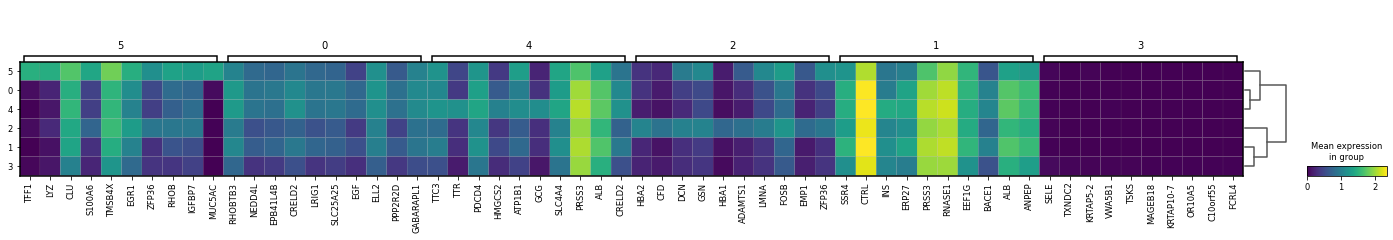

In [59]:
sc.pl.rank_genes_groups_matrixplot(adata_C3, n_genes=10, key="t-test", groupby="domain")


## Get the top 300 HVG

In [174]:
adata_C3_var = adata_C3.var

In [175]:
adata_C3_var = adata_C3_var.sort_values(by=['highly_variable_rank'])

In [176]:
adata_C3_var = adata_C3_var[:300]

In [177]:
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/HVG"
os.makedirs(sevenbg_output_path, exist_ok=True)
adata_C3_var.to_csv(f"{sevenbg_output_path}/C3_300_HVG.csv")

# save in workspace
outputs = ("../outputs/")
adata_C3_var.to_csv(f"{outputs}/C3_300_HVG.csv")

# 5. PanCN D4

Preprocessing :

In [61]:
adata_D4 = sc.read_h5ad("/../../sbgenomics/project-files/graphst_anndata/PanCN_D4_anndata_graphst_6_clusters.h5ad")

In [62]:
adata_D4

AnnData object with n_obs × n_vars = 2316 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [63]:
adata_D4.var["highly_variable"]

SAMD11     False
NOC2L      False
KLHL17     False
PLEKHN1    False
PERM1      False
           ...  
TSPY1      False
USP9Y      False
DDX3Y      False
TMSB4Y     False
KDM5D      False
Name: highly_variable, Length: 17943, dtype: bool

In [64]:
adata_D4.var["mt"] = adata_D4.var_names.str.startswith("MT-")

In [65]:
sc.pp.calculate_qc_metrics(adata_D4, qc_vars=["mt"], inplace=True)

In [66]:
adata_D4

AnnData object with n_obs × n_vars = 2316 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'

In [67]:
sc.pp.log1p(adata_D4)

In [68]:
adata_D4.uns["log1p"]

{'base': None}

In [69]:
sc.pp.pca(adata_D4)

Rank genes :

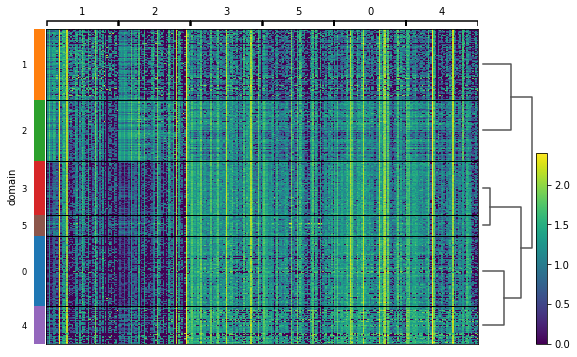

In [70]:
sc.tl.rank_genes_groups(adata_D4, "domain", method="t-test", key_added = "t-test")
sc.pl.rank_genes_groups_heatmap(adata_D4, n_genes=50, key="t-test", groupby="domain")

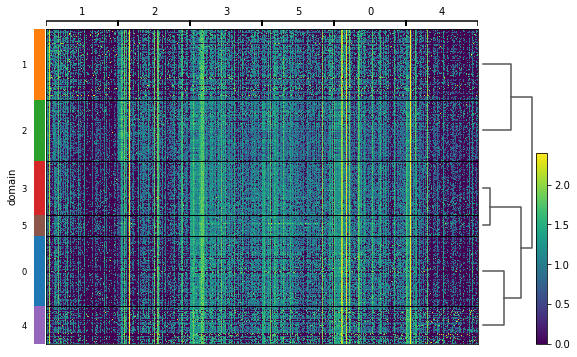

In [71]:
sc.pl.rank_genes_groups_heatmap(adata_D4, n_genes=300, key="t-test", groupby="domain")

In [72]:
adata_D4

AnnData object with n_obs × n_vars = 2316 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial', 'pca', 't-test', 'domain_colors', 'dendrogram_domain'
    obsm: 'adj', 'distance_matrix', 'emb', 'emb_pca', 'feat', 'feat_a', 'graph_neigh', 'label_CSL', 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

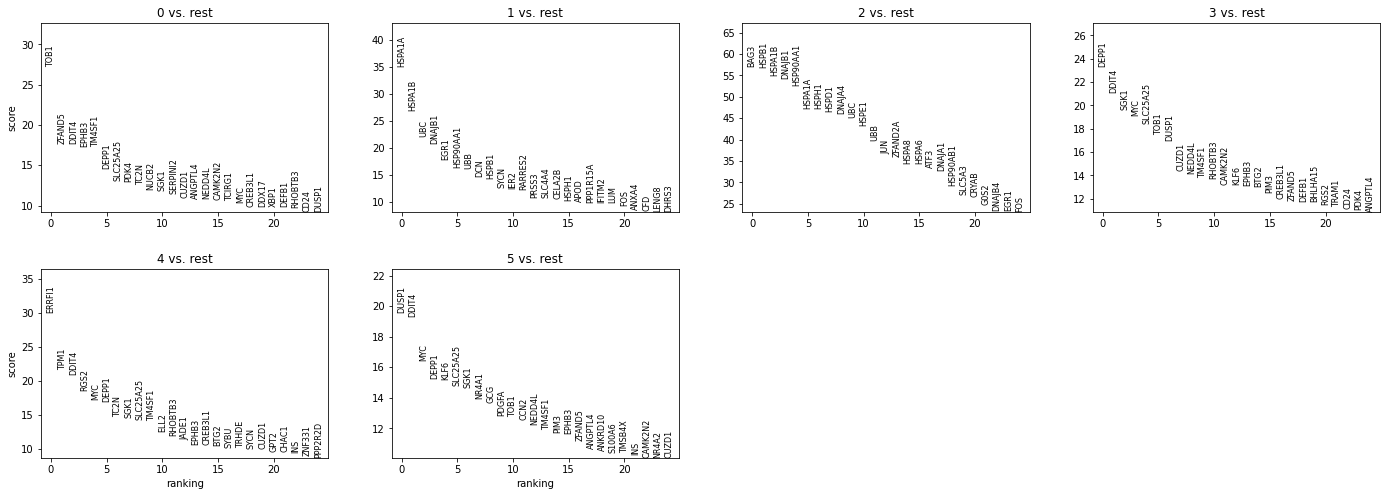

In [73]:
sc.tl.rank_genes_groups(adata_D4, "domain", method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_D4, n_genes=25, sharey=False, key = "t-test")

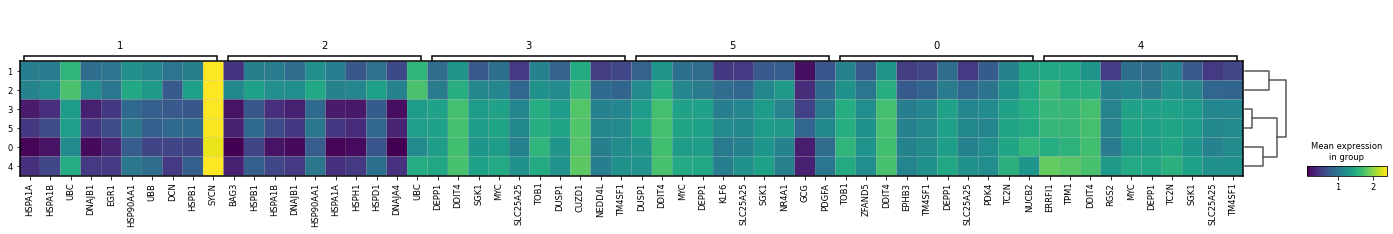

In [74]:
sc.pl.rank_genes_groups_matrixplot(adata_D4, n_genes=10, key="t-test", groupby="domain")


## Get the top 300 HVG

In [178]:
adata_D4_var = adata_D4.var

In [179]:
adata_D4_var = adata_D4_var.sort_values(by=['highly_variable_rank'])

In [180]:
adata_D4_var = adata_D4_var[:300]

In [181]:
# save in output files
sevenbg_output_path = f"/sbgenomics/output-files/HVG"
os.makedirs(sevenbg_output_path, exist_ok=True)
adata_D4_var.to_csv(f"{sevenbg_output_path}/D4_300_HVG.csv")

# save in workspace
outputs = ("../outputs/")
adata_D4_var.to_csv(f"{outputs}/D4_300_HVG.csv")